# London Air Quality Exploration

Enders Analysis: February 7, 2021

In [1]:
# import necessary libariaries
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# change working directory to a specified directory
os.chdir('../')
print("Directory Changes")

# get current working directory
cwd = os.getcwd()
print("Current working directory is:", cwd)

Directory Changes
Current working directory is: C:\Users\Leonardo\OneDrive\Documents\TU_Delft\CodingProjects\Enders_Analysis


In [3]:
# read in air quality data for GLA 2020 and 2021
data_2020_2021 = pd.read_csv('data/processed/gl_AQ.csv')
sites_geo = pd.read_csv('data/processed/gla_codes.csv')
boroughs = gpd.read_file('data/raw/London_Borough_Excluding_MHW.shp')

In [4]:
data_2020_2021 = pd.merge(data_2020_2021, sites_geo, left_on="Site", right_on="code", how="left")

In [9]:
# # gain insight into data_2020_2021
# data_2020_2021.tail(25)

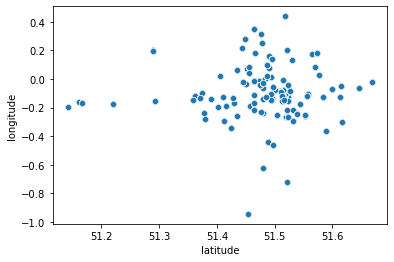

In [8]:
# gain insight into data_2020_2021
sns.scatterplot(data = data_2020_2021, x = 'latitude', y = 'longitude')

In [10]:
# find the unique codes (air quality monitors across GLA) in the dataset
code_list = data_2020_2021['code'].unique()
len(code_list)

125

In [11]:
data_2020_2021['Species'][data_2020_2021['Species']=="FINE"] = "PM2.5"

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# find the unique types of pollutants in the dataset
pollutant_list = data_2020_2021['Species'].unique()
len(pollutant_list)

2

In [8]:
# plan
# code: 11 different codes 
# pollutant: types of pollutant, 15 different types
# date: 24 time stamps per day, need to take an average for the pollutant type for these values to get a daily average for each reading per code

# remove NA values from 'value'
# create new column with date, no time called "new_date"
# collapse on 'code', 'new_data', and 'pollutant' to get average of value (i.e. group_by code, new_date, and pollutant (take mean of value in the process) )

In [13]:
# gain insight into data_2020_2021
data_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305250 entries, 0 to 305249
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0_x             305250 non-null  int64  
 1   Site                     305250 non-null  object 
 2   Species                  305250 non-null  object 
 3   ReadingDateTime          305250 non-null  object 
 4   Value                    105405 non-null  float64
 5   Units                    305250 non-null  object 
 6   Provisional or Ratified  305250 non-null  object 
 7   Unnamed: 0_y             302808 non-null  float64
 8   site                     302808 non-null  object 
 9   code                     302808 non-null  object 
 10  latitude                 295482 non-null  float64
 11  longitude                295482 non-null  float64
 12  site_type                302808 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 32.6+ MB


## 1) GLA Borough Analysis

In [14]:
# keep rows only where 'value' is not NA
boroughs.NAME = boroughs.NAME.str.replace('Westminster', 'City of Westminster')

In [15]:
boroughs = boroughs.to_crs("EPSG:4326")

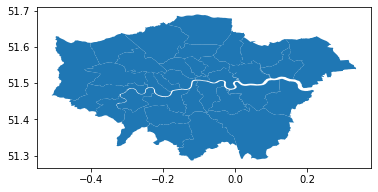

In [16]:
boroughs.plot()

In [17]:
data_2020_2021_gdf = gpd.GeoDataFrame(data_2020_2021, geometry=gpd.points_from_xy(data_2020_2021.longitude, data_2020_2021.latitude), crs=boroughs.crs)

In [18]:
data_2020_2021_gdf.crs

'EPSG:4326'

In [19]:
# buffer points to 400 meters so that they cover all boroughs
data_2020_2021_gdf = data_2020_2021_gdf.dropna(subset=['latitude','longitude'])
# buffer_length_in_meters = (5 * 1000) * 1.60934
data_2020_2021_gdf['geometry'] = data_2020_2021_gdf.geometry.buffer(0.009)

In [98]:
# data_2020_2021_gdf.plot()

In [75]:
boroughs_AQ = gpd.sjoin(data_2020_2021_gdf, boroughs, how='right')
boroughs_AQ = boroughs_AQ.groupby(['Species', 'GSS_CODE', 'ReadingDateTime']).mean()[['Value']].reset_index()

In [79]:
# data_2020_2021_gdf[(data_2020_2021_gdf['ReadingDateTime']=="03/12/2018 00:00")&
#                    (data_2020_2021_gdf['Value'].isna()==False)].plot()

In [78]:
# boroughs_AQ[(boroughs_AQ['ReadingDateTime']=="03/12/2018 00:00")&
#                    (boroughs_AQ['Value'].isna()==False)]

In [80]:
boroughs_AQ.GSS_CODE.unique()

array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000032', 'E09000033'], dtype=object)

In [81]:
boroughs_AQ[boroughs_AQ['Value'].isna()==True].GSS_CODE.unique()

array(['E09000006', 'E09000017', 'E09000018', 'E09000001', 'E09000002',
       'E09000003', 'E09000009', 'E09000010', 'E09000012', 'E09000013',
       'E09000014', 'E09000015', 'E09000016', 'E09000019', 'E09000021',
       'E09000025', 'E09000026', 'E09000027', 'E09000029', 'E09000030',
       'E09000032'], dtype=object)

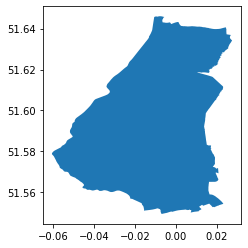

In [82]:
boroughs[boroughs['GSS_CODE']=='E09000031'].plot()

In [83]:
boroughs_AQ['ReadingDateTime'] = pd.to_datetime(boroughs_AQ['ReadingDateTime'], format='%d/%m/%Y %H:%M')

In [84]:
boroughs_AQ.to_csv('data/processed/AQ_boroughs.csv')

In [85]:
boroughs_AQ = pd.read_csv("data/processed/AQ_boroughs.csv")
boroughs_AQ['ReadingDateTime'] = pd.to_datetime(boroughs_AQ['ReadingDateTime'])
boroughs_AQ

Species   GSS_CODE ReadingDateTime      Value
0         NO2  E09000001      2019-01-01  39.416667
1         NO2  E09000001      2020-01-01  54.028571
2         NO2  E09000001      2021-01-01  30.414286
3         NO2  E09000001      2019-02-01  60.383333
4         NO2  E09000001      2020-02-01  33.720000
...       ...        ...             ...        ...
52091   PM2.5  E09000033      2019-10-31  25.311111
52092   PM2.5  E09000033      2020-10-31   7.155556
52093   PM2.5  E09000033      2018-12-31   5.762500
52094   PM2.5  E09000033      2019-12-31  20.387500
52095   PM2.5  E09000033      2020-12-31  15.675000

[52096 rows x 4 columns]

In [237]:
boroughs_AQ_long = boroughs_AQ.pivot_table(index=["GSS_CODE","ReadingDateTime"], columns="Species", values="Value").reset_index()

In [238]:
boroughs_AQ_long['GSS_CODE'].unique()

array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000032', 'E09000033'], dtype=object)

In [239]:
for metric in list(boroughs_AQ_long.columns[2:].values):
    boroughs_AQ_long[f'SMA_3_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_7_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_10_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_30_{metric}'] = np.NaN
    boroughs_AQ_long[f'SMA_45_{metric}'] = np.NaN
    
    for code in boroughs_AQ_long['GSS_CODE'].unique():
        # Calculate rolling averages for each borough
        boroughs_AQ_long[f'SMA_3_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=3).mean()
#     gla_total_long[f'SMA_5_{metric}'] = gla_total_long[metric].rolling(window=5).mean()
        boroughs_AQ_long[f'SMA_7_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=7).mean()
        boroughs_AQ_long[f'SMA_10_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=10).mean()
#     gla_total_long[f'SMA_20_{metric}'] = gla_total_long[metric].rolling(window=20).mean()
        boroughs_AQ_long[f'SMA_30_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=30).mean()
        boroughs_AQ_long[f'SMA_45_{metric}'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[metric][boroughs_AQ_long['GSS_CODE']==code].rolling(window=45).mean()

# calculate change from baseline for each code
boroughs_AQ_long['NO2_pc_change_from_baseline'] = np.NaN
boroughs_AQ_long['PM25_pc_change_from_baseline'] = np.NaN

for code in boroughs_AQ_long['GSS_CODE'].unique():
    boroughs_AQ_long['NO2_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['SMA_30_NO2'][boroughs_AQ_long['GSS_CODE']==code].pct_change(365, fill_method='pad').mul(100)
    boroughs_AQ_long['PM25_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['SMA_30_PM2.5'][boroughs_AQ_long['GSS_CODE']==code].pct_change(365, fill_method='pad').mul(100)

    
# for code in boroughs_AQ_long['GSS_CODE'].unique():
#     boroughs_AQ_long['NO2_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)] = boroughs_AQ_long['SMA_30_NO2'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)].pct_change(731, fill_method='pad').mul(100)
#     boroughs_AQ_long['PM25_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)] = boroughs_AQ_long['SMA_30_PM2.5'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)].pct_change(731, fill_method='pad').mul(100)
# #     boroughs_AQ_long['NO2_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year==2020)] = boroughs_AQ_long['SMA_30_NO2'][(boroughs_AQ_long['GSS_CODE']==code)].pct_change(731, fill_method='pad').mul(100)[boroughs_AQ_long['ReadingDateTime'].dt.year==2020]
# #     boroughs_AQ_long['PM25_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year==2020)] = boroughs_AQ_long['SMA_30_PM2.5'][(boroughs_AQ_long['GSS_CODE']==code)].pct_change(731, fill_method='pad').mul(100)[boroughs_AQ_long['ReadingDateTime'].dt.year==2020]
    
for code in boroughs_AQ_long['GSS_CODE'].unique():
    try:
        boroughs_AQ_long['NO2_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)] = boroughs_AQ_long['SMA_30_NO2'][(boroughs_AQ_long['GSS_CODE']==code)].pct_change(731, fill_method='pad').mul(100).reset_index()[762:].drop('index', axis=1).iloc[:,0]
    except ValueError:
        try:
            boroughs_AQ_long['PM25_pc_change_from_baseline'][(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['ReadingDateTime'].dt.year>2020)] = boroughs_AQ_long['SMA_30_PM2.5'][(boroughs_AQ_long['GSS_CODE']==code)].pct_change(731, fill_method='pad').mul(100).reset_index()[762:].drop('index', axis=1).iloc[:,0]
        except ValueError:
            pass
        
boroughs_AQ_long['AQindex_pc_change_from_baseline'] = np.NaN
# final score
for code in boroughs_AQ_long['GSS_CODE'].unique():

    boroughs_AQ_long['AQindex_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long[['PM25_pc_change_from_baseline', 'NO2_pc_change_from_baseline']][boroughs_AQ_long['GSS_CODE']==code].mean(axis=1)
#     if len(boroughs_AQ_long[(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['PM25_pc_change_from_baseline']).isna()==True]) > 700:
#         boroughs_AQ_long['AQindex_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['NO2_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code]
    
#     elif len(boroughs_AQ_long[(boroughs_AQ_long['GSS_CODE']==code)&(boroughs_AQ_long['NO2_pc_change_from_baseline']).isna()==True]) > 700:
#         boroughs_AQ_long['AQindex_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = boroughs_AQ_long['PM25_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code]
    
#     else:
#         boroughs_AQ_long['AQindex_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] = (boroughs_AQ_long['PM25_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code] + boroughs_AQ_long['NO2_pc_change_from_baseline'][boroughs_AQ_long['GSS_CODE']==code])/2

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.pat

In [240]:
missing_code = boroughs_AQ_long[boroughs_AQ_long['GSS_CODE']=="E09000033"]
missing_code['GSS_CODE'] = "E09000031"
missing_code['AQindex_pc_change_from_baseline'] = np.NaN
# add empty row for code E0900031
boroughs_AQ_long = boroughs_AQ_long.append(missing_code)

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


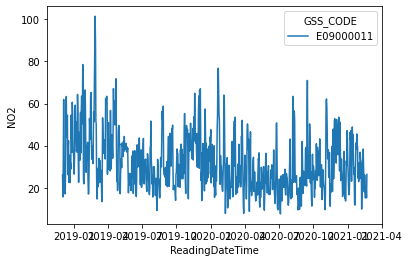

In [252]:
boroughs_AQ_long['ReadingDateTime'] = pd.to_datetime(boroughs_AQ_long['ReadingDateTime'])
sns.lineplot(data=boroughs_AQ_long[boroughs_AQ_long['GSS_CODE']=='E09000011'], x="ReadingDateTime", y="NO2", hue="GSS_CODE")

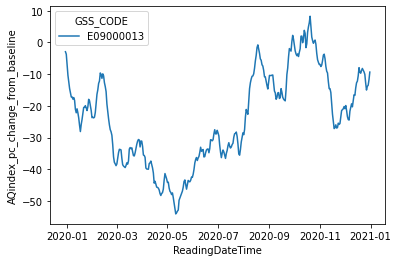

In [268]:
sns.lineplot(data=boroughs_AQ_long[boroughs_AQ_long['GSS_CODE']=='E09000013'], x="ReadingDateTime", y="AQindex_pc_change_from_baseline", hue="GSS_CODE")

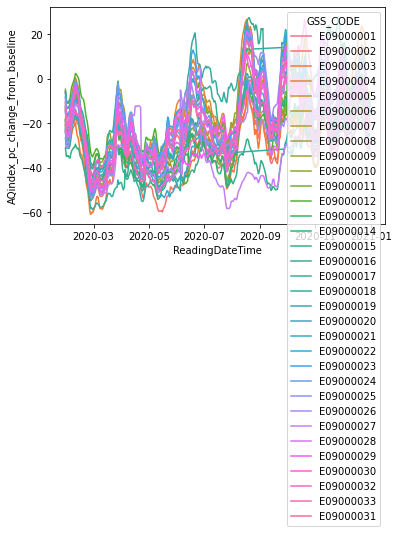

In [339]:
sns.lineplot(data=boroughs_AQ_long, x="ReadingDateTime", y="AQindex_pc_change_from_baseline", hue="GSS_CODE")

In [269]:
boroughs_AQ_long.to_csv('data/processed_final/AQ_boroughs.csv')

## 2) GLA Analysis

In [271]:
# make new variable, gla_total, by using group_by on data_2020_2021 to group by 'new_date', and 'pollutant', taking the mean of 'value', and ignoring 'code', 'latitude', and 'longitude'
gla_total = data_2020_2021[data_2020_2021['Value'].notna()] 
gla_total = gla_total.groupby(['ReadingDateTime', 'Species'], as_index=False)['Value'].mean()
gla_total

ReadingDateTime Species      Value
0     01/01/2019 00:00     NO2  26.845745
1     01/01/2019 00:00   PM2.5   7.381250
2     01/01/2020 00:00     NO2  44.726263
3     01/01/2020 00:00   PM2.5  31.903030
4     01/01/2021 00:00     NO2  28.931633
...                ...     ...        ...
1623  31/12/2018 00:00   PM2.5   6.484848
1624  31/12/2019 00:00     NO2  39.659223
1625  31/12/2019 00:00   PM2.5  20.084375
1626  31/12/2020 00:00     NO2  37.626804
1627  31/12/2020 00:00   PM2.5  16.652381

[1628 rows x 3 columns]

In [274]:
# convert 'date_new' to date-time object
gla_total['ReadingDateTime'] = pd.to_datetime(gla_total['ReadingDateTime'], format='%d/%m/%Y %H:%M')
gla_total[gla_total['Species']=='NO2'].sort_values('ReadingDateTime').tail()

ReadingDateTime Species      Value
874       2021-02-17     NO2  19.341667
928       2021-02-18     NO2  21.849485
982       2021-02-19     NO2  21.986869
1036      2021-02-20     NO2  17.204000
1090      2021-02-21     NO2  27.940000

In [34]:
# remove weekends
# gla_total = gla_total[gla_total['ReadingDateTime'].dt.weekday < 5]

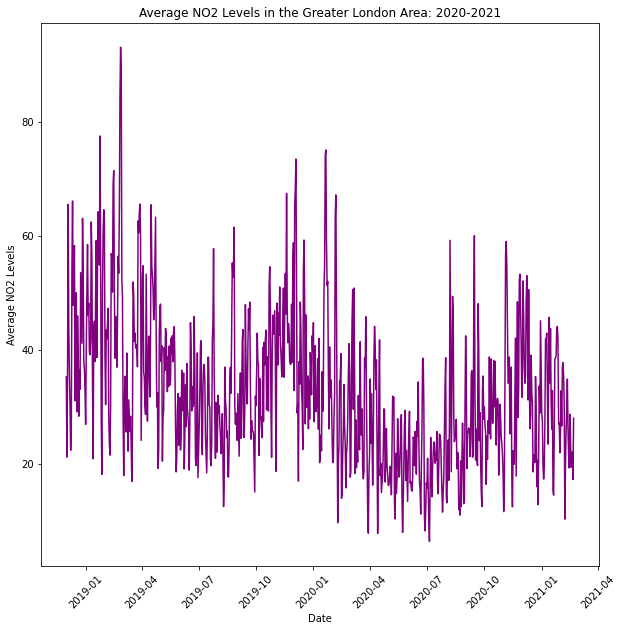

In [275]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# NO2
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total.sort_values('ReadingDateTime')['ReadingDateTime'][gla_total['Species']=='NO2'],
        gla_total.sort_values('ReadingDateTime')['Value'][gla_total['Species']=='NO2'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average NO2 Levels",
       title="Average NO2 Levels in the Greater London Area: 2020-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

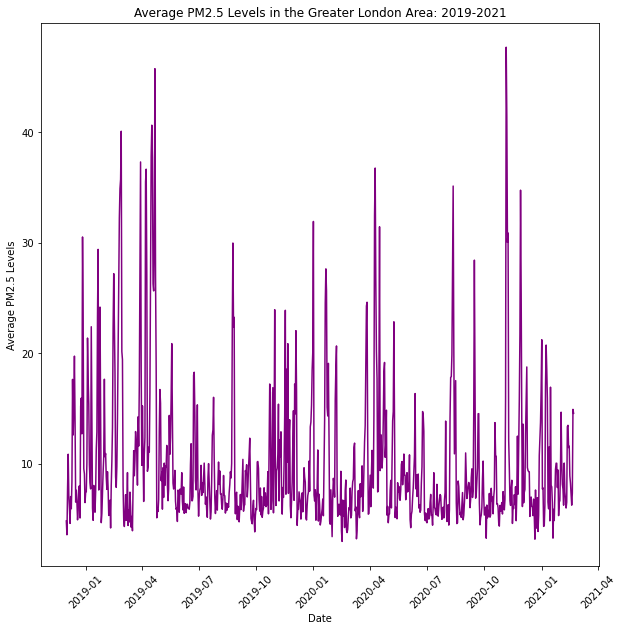

In [276]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# air_temp
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total.sort_values('ReadingDateTime')['ReadingDateTime'][gla_total['Species']=='PM2.5'],
        gla_total.sort_values('ReadingDateTime')['Value'][gla_total['Species']=='PM2.5'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Average PM2.5 Levels",
       title="Average PM2.5 Levels in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [277]:
# pivot data for rolling average
gla_total_long = gla_total.pivot(index="ReadingDateTime", columns="Species", values="Value")

In [278]:
gla_total_long

Species                NO2      PM2.5
ReadingDateTime                      
2018-12-01       35.220213   4.825806
2018-12-02       21.117021   3.574194
2018-12-03       36.531522   7.746667
2018-12-04       65.474194  10.858065
2018-12-05       43.219355   7.142857
...                    ...        ...
2021-02-17       19.341667   7.290000
2021-02-18       21.849485   6.252632
2021-02-19       21.986869   7.346154
2021-02-20       17.204000  14.915385
2021-02-21       27.940000  14.557500

[814 rows x 2 columns]

In [279]:
for metric in list(gla_total_long.columns.values):
    gla_total_long[f'SMA_3_{metric}'] = gla_total_long[metric].rolling(window=3).mean()
    gla_total_long[f'SMA_5_{metric}'] = gla_total_long[metric].rolling(window=5).mean()
    gla_total_long[f'SMA_7_{metric}'] = gla_total_long[metric].rolling(window=7).mean()
    gla_total_long[f'SMA_10_{metric}'] = gla_total_long[metric].rolling(window=10).mean()
    gla_total_long[f'SMA_20_{metric}'] = gla_total_long[metric].rolling(window=20).mean()
    gla_total_long[f'SMA_30_{metric}'] = gla_total_long[metric].rolling(window=30).mean()
    gla_total_long[f'SMA_45_{metric}'] = gla_total_long[metric].rolling(window=45).mean()

In [280]:
gla_total_long

Species                NO2      PM2.5  SMA_3_NO2  SMA_5_NO2  SMA_7_NO2  \
ReadingDateTime                                                          
2018-12-01       35.220213   4.825806        NaN        NaN        NaN   
2018-12-02       21.117021   3.574194        NaN        NaN        NaN   
2018-12-03       36.531522   7.746667  30.956252        NaN        NaN   
2018-12-04       65.474194  10.858065  41.040912        NaN        NaN   
2018-12-05       43.219355   7.142857  48.408357  40.312461        NaN   
...                    ...        ...        ...        ...        ...   
2021-02-17       19.341667   7.290000  24.315428  22.775262  25.023608   
2021-02-18       21.849485   6.252632  22.050870  22.802659  23.172660   
2021-02-19       21.986869   7.346154  21.059340  23.356527  22.530380   
2021-02-20       17.204000  14.915385  20.346784  21.068696  21.886309   
2021-02-21       27.940000  14.557500  22.376956  21.664404  23.132377   

Species          SMA_10_NO2  SMA_20_NO2  SMA_30_NO2  SMA_45_NO2  SMA_3_PM2.5  \
ReadingDateTime                                                                
2018-12-01              NaN         NaN         NaN         NaN          NaN   
2018-12-02              NaN         NaN         NaN         NaN          NaN   
2018-12-03              NaN         NaN         NaN         NaN     5.382222   
2018-12-04              NaN         NaN         NaN         NaN     7.392975   
2018-12-05              NaN         NaN         NaN         NaN     8.582529   
...                     ...         ...         ...         ...          ...   
2021-02-17        24.995478   26.716139   28.725763   30.167760     8.138943   
2021-02-18        25.209040   26.449851   28.943460   30.269495     7.256487   
2021-02-19        24.841161   26.455995   29.194706   30.330428     6.962928   
2021-02-20        23.620561   26.035195   28.920698   30.106049     9.504723   
2021-02-21        22.933949   25.793811   28.571865   29.797453    12.273013   

Species          SMA_5_PM2.5  SMA_7_PM2.5  SMA_10_PM2.5  SMA_20_PM2.5  \
ReadingDateTime                                                         
2018-12-01               NaN          NaN           NaN           NaN   
2018-12-02               NaN          NaN           NaN           NaN   
2018-12-03               NaN          NaN           NaN           NaN   
2018-12-04               NaN          NaN           NaN           NaN   
2018-12-05          6.829518          NaN           NaN           NaN   
...                      ...          ...           ...           ...   
2021-02-17          9.493543    10.613170      9.362820      9.038571   
2021-02-18          8.451511     9.598920      9.306528      9.025622   
2021-02-19          7.603123     8.723786      9.441825      9.059906   
2021-02-20          8.806200     9.217014     10.280636      9.329009   
2021-02-21         10.072334     9.641214     10.401148      9.323907   

Species          SMA_30_PM2.5  SMA_45_PM2.5  
ReadingDateTime                              
2018-12-01                NaN           NaN  
2018-12-02                NaN           NaN  
2018-12-03                NaN           NaN  
2018-12-04                NaN           NaN  
2018-12-05                NaN           NaN  
...                       ...           ...  
2021-02-17           8.468527      9.098183  
2021-02-18           8.567874      9.140797  
2021-02-19           8.616800      9.206430  
2021-02-20           8.951997      9.399400  
2021-02-21           9.200054      9.344900  

[814 rows x 16 columns]

In [281]:
## SELECT ROLLING WINDOW
window = "45"

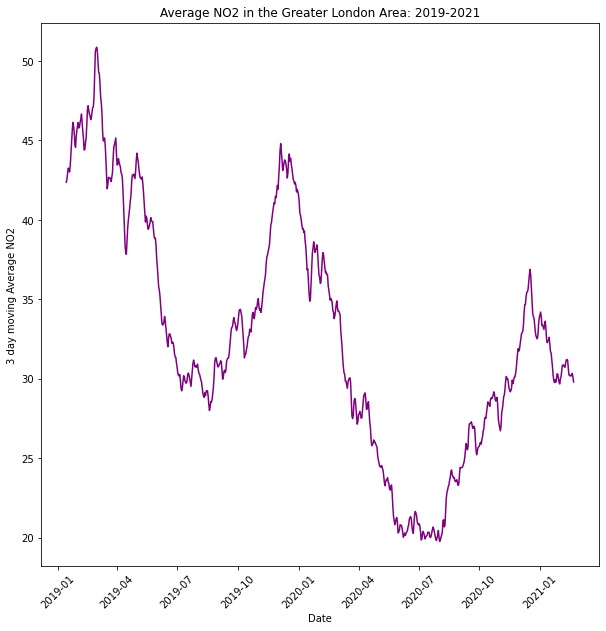

In [282]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# NO2
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.index,
        gla_total_long[f'SMA_{window}_NO2'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average NO2",
       title="Average NO2 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

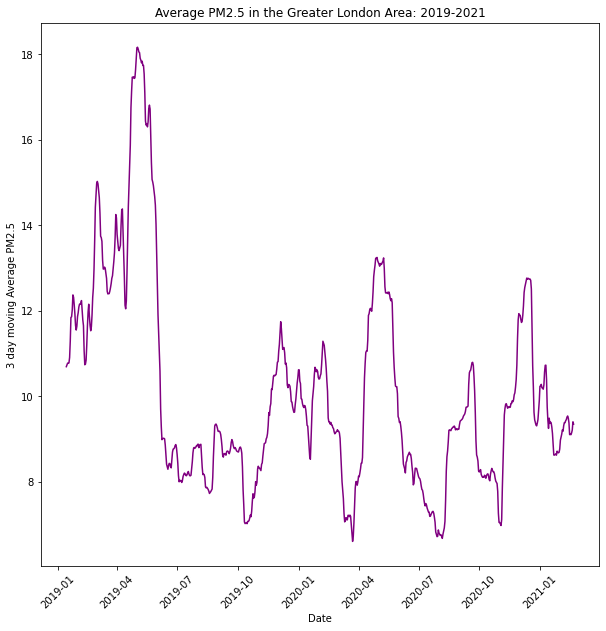

In [283]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.index,
        gla_total_long[f'SMA_{window}_PM2.5'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average PM2.5",
       title="Average PM2.5 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [284]:
gla_total_long = gla_total_long.reset_index()

In [285]:
# for 2020 data
gla_total_long['NO2_pc_change_from_baseline'] = gla_total_long['SMA_30_NO2'].pct_change(365, fill_method='pad').mul(100)
gla_total_long['PM25_pc_change_from_baseline'] = gla_total_long['SMA_30_PM2.5'].pct_change(365, fill_method='pad').mul(100)
# for 2021 data
gla_total_long['NO2_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['SMA_30_NO2'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]
gla_total_long['PM25_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['SMA_30_PM2.5'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]

gla_total_long['AQindex_pc_change_from_baseline'] = gla_total_long[['PM25_pc_change_from_baseline', 'NO2_pc_change_from_baseline']].mean(axis=1)

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [313]:
# # for 2020 data
# gla_total_long['NO2_pc_change_from_baseline'] = gla_total_long['NO2'].pct_change(365, fill_method='pad').mul(100)
# gla_total_long['PM25_pc_change_from_baseline'] = gla_total_long['PM2.5'].pct_change(365, fill_method='pad').mul(100)
# # for 2021 data
# gla_total_long['NO2_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['NO2'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]
# gla_total_long['PM25_pc_change_from_baseline'][gla_total_long['ReadingDateTime'].dt.year==2021] = gla_total_long['PM2.5'].pct_change(731, fill_method='pad').mul(100)[gla_total_long['ReadingDateTime'].dt.year==2021]

# # calculate 30 day rolling average
# for metric in ['PM25_pc_change_from_baseline', 'NO2_pc_change_from_baseline']:
#     gla_total_long[f'SMA_30_{metric}'] = gla_total_long[metric].rolling(window=30).mean()

# gla_total_long['AQindex_pc_change_from_baseline'] = (gla_total_long['SMA_30_PM25_pc_change_from_baseline'] + gla_total_long['SMA_30_NO2_pc_change_from_baseline'])/2

In [286]:
gla_total_long

Species ReadingDateTime        NO2      PM2.5  SMA_3_NO2  SMA_5_NO2  \
0            2018-12-01  35.220213   4.825806        NaN        NaN   
1            2018-12-02  21.117021   3.574194        NaN        NaN   
2            2018-12-03  36.531522   7.746667  30.956252        NaN   
3            2018-12-04  65.474194  10.858065  41.040912        NaN   
4            2018-12-05  43.219355   7.142857  48.408357  40.312461   
..                  ...        ...        ...        ...        ...   
809          2021-02-17  19.341667   7.290000  24.315428  22.775262   
810          2021-02-18  21.849485   6.252632  22.050870  22.802659   
811          2021-02-19  21.986869   7.346154  21.059340  23.356527   
812          2021-02-20  17.204000  14.915385  20.346784  21.068696   
813          2021-02-21  27.940000  14.557500  22.376956  21.664404   

Species  SMA_7_NO2  SMA_10_NO2  SMA_20_NO2  SMA_30_NO2  SMA_45_NO2  \
0              NaN         NaN         NaN         NaN         NaN   
1              NaN         NaN         NaN         NaN         NaN   
2              NaN         NaN         NaN         NaN         NaN   
3              NaN         NaN         NaN         NaN         NaN   
4              NaN         NaN         NaN         NaN         NaN   
..             ...         ...         ...         ...         ...   
809      25.023608   24.995478   26.716139   28.725763   30.167760   
810      23.172660   25.209040   26.449851   28.943460   30.269495   
811      22.530380   24.841161   26.455995   29.194706   30.330428   
812      21.886309   23.620561   26.035195   28.920698   30.106049   
813      23.132377   22.933949   25.793811   28.571865   29.797453   

Species  SMA_3_PM2.5  SMA_5_PM2.5  SMA_7_PM2.5  SMA_10_PM2.5  SMA_20_PM2.5  \
0                NaN          NaN          NaN           NaN           NaN   
1                NaN          NaN          NaN           NaN           NaN   
2           5.382222          NaN          NaN           NaN           NaN   
3           7.392975          NaN          NaN           NaN           NaN   
4           8.582529     6.829518          NaN           NaN           NaN   
..               ...          ...          ...           ...           ...   
809         8.138943     9.493543    10.613170      9.362820      9.038571   
810         7.256487     8.451511     9.598920      9.306528      9.025622   
811         6.962928     7.603123     8.723786      9.441825      9.059906   
812         9.504723     8.806200     9.217014     10.280636      9.329009   
813        12.273013    10.072334     9.641214     10.401148      9.323907   

Species  SMA_30_PM2.5  SMA_45_PM2.5  NO2_pc_change_from_baseline  \
0                 NaN           NaN                          NaN   
1                 NaN           NaN                          NaN   
2                 NaN           NaN                          NaN   
3                 NaN           NaN                          NaN   
4                 NaN           NaN                          NaN   
..                ...           ...                          ...   
809          8.468527      9.098183                   -39.717125   
810          8.567874      9.140797                   -39.567084   
811          8.616800      9.206430                   -38.519971   
812          8.951997      9.399400                   -37.908457   
813          9.200054      9.344900                   -38.112337   

Species  PM25_pc_change_from_baseline  AQindex_pc_change_from_baseline  
0                                 NaN                              NaN  
1                                 NaN                              NaN  
2                                 NaN                              NaN  
3                                 NaN                              NaN  
4                                 NaN                              NaN  
..                                ...                              ...  
809                        -33.052329    

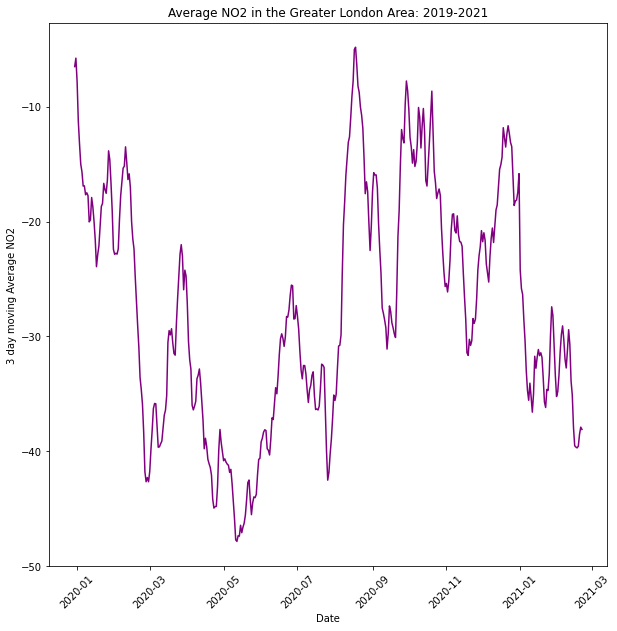

In [288]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.ReadingDateTime,
        gla_total_long['NO2_pc_change_from_baseline'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average NO2",
       title="Average NO2 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

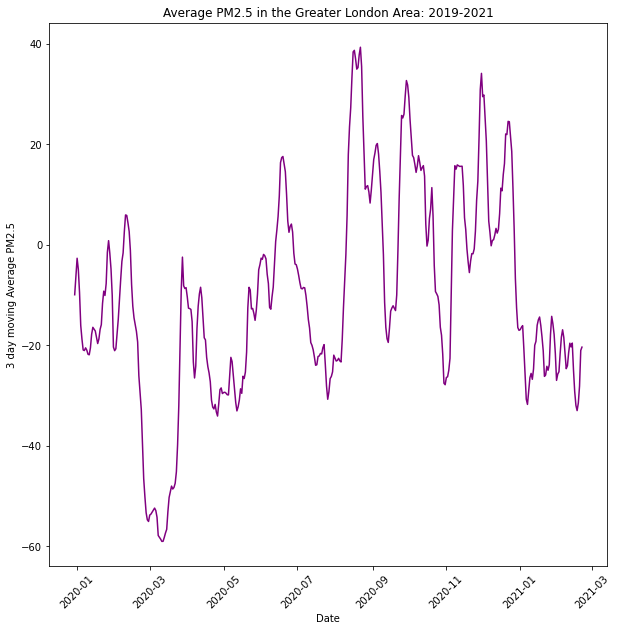

In [289]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.ReadingDateTime,
        gla_total_long['PM25_pc_change_from_baseline'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average PM2.5",
       title="Average PM2.5 in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

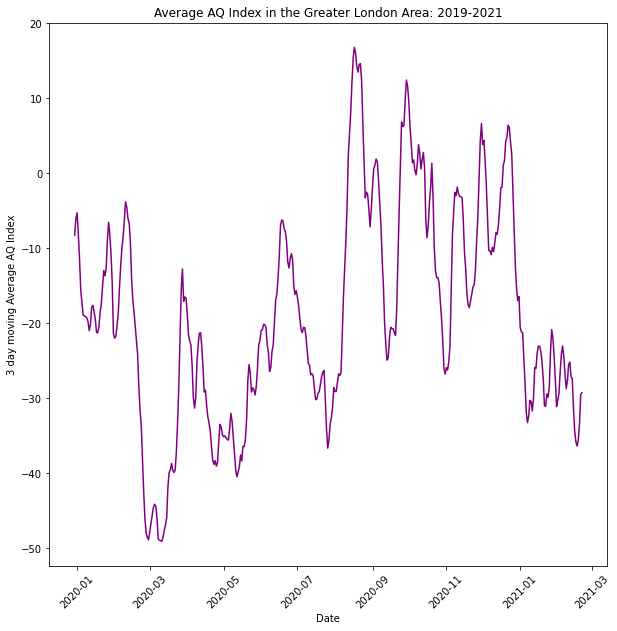

In [290]:
# plot each 'value' of each 'pollutant' type seperately over time (i.e. over 'new_date')
# PM2.5
# create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# add x-axis and y-axis
ax.plot(gla_total_long.ReadingDateTime,
        gla_total_long['AQindex_pc_change_from_baseline'],
        color='purple')

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="3 day moving Average AQ Index",
       title="Average AQ Index in the Greater London Area: 2019-2021")

# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [291]:
gla_total_long.to_csv('data/processed_final/AQ_gla.csv')

In [292]:
gla_total_long.tail(50)

Species ReadingDateTime        NO2      PM2.5  SMA_3_NO2  SMA_5_NO2  \
764          2021-01-03  19.522449   7.816667  25.277211  31.702409   
765          2021-01-04  17.271429   4.335000  21.390476  26.145973   
766          2021-01-05  19.244898   4.392683  18.679592  22.469592   
767          2021-01-06  27.301053   6.231707  21.272460  22.143476   
768          2021-01-07  41.826804  17.010000  29.457585  25.033326   
769          2021-01-08  41.761856  20.728205  36.963237  29.481208   
770          2021-01-09  42.887629  18.565789  42.158763  34.604448   
771          2021-01-10  32.454639  15.915789  39.034708  37.246396   
772          2021-01-11  23.405208   6.547222  32.915825  36.467227   
773          2021-01-12  36.290625   5.919444  30.716824  35.359991   
774          2021-01-13  45.678571  11.527027  35.124802  36.143335   
775          2021-01-14  34.119792   4.834211  38.696329  34.389767   
776          2021-01-15  43.690526  16.920000  41.162963  36.636945   
777          2021-01-16  31.012371   8.041026  36.274230  38.158377   
778          2021-01-17  26.038144   7.905128  33.580347  36.107881   
779          2021-01-18  32.792784   6.489189  29.947766  33.530723   
780          2021-01-19  15.318557   3.272222  24.716495  29.770476   
781          2021-01-20  14.449495   5.878378  20.853612  23.922270   
782          2021-01-21  25.424242   4.859459  18.397431  22.804644   
783          2021-01-22  38.405000   7.115789  26.092912  25.278016   
784          2021-01-23  38.486139   9.479487  34.105127  26.416687   
785          2021-01-24  38.883000  10.047368  38.591380  31.129575   
786          2021-01-25  43.838384  10.040541  40.402507  37.007353   
787          2021-01-26  44.050495   7.845714  42.257293  40.732604   
788          2021-01-27  41.684000   9.435897  43.190960  41.388404   
789          2021-01-28  26.910784   5.309524  37.548426  39.073333   
790          2021-01-29  27.175248   6.511628  31.923344  36.731782   
791          2021-01-30  21.864000   6.660465  25.316677  32.336905   
792          2021-01-31  25.620000   9.533333  24.886416  28.650806   
793          2021-02-01  32.767677  14.659524  26.750559  26.867542   
794          2021-02-02  26.600000  10.163415  28.329226  26.805385   
795          2021-02-03  36.770000   8.150000  32.045892  28.724335   
796          2021-02-04  37.700000   7.706977  33.690000  31.891535   
797          2021-02-05  35.289899   6.252381  36.586633  33.825515   
798          2021-02-06  30.340594  10.057778  34.443498  33.340099   
799          2021-02-07  10.240594   7.447727  25.290362  30.068217   
800          2021-02-08  19.713861   6.815556  20.098350  26.656990   
801          2021-02-09  25.665657   5.993182  18.540037  24.250121   
802          2021-02-10  29.410000   6.527273  24.929839  23.074141   
803          2021-02-11  34.806122  13.352381  29.960593  23.967247   
804          2021-02-12  26.482828  13.472093  30.232984  27.215694   
805          2021-02-13  21.712500  11.462791  27.667150  27.615421   
806          2021-02-14  19.217526  11.588095  22.470951  26.325795   
807          2021-02-15  28.643158   8.900000  23.191061  26.172427   
808          2021-02-16  24.961458   8.226829  24.274047  24.203494   
809          2021-02-17  19.341667   7.290000  24.315428  22.775262   
810          2021-02-18  21.849485   6.252632  22.050870  22.802659   
811          2021-02-19  21.986869   7.346154  21.059340  23.356527   
812          2021-02-20  17.204000  14.915385  20.346784  21.068696   
813          2021-02-21  27.940000  14.557500  22.376956  21.664404   

Species  SMA_7_NO2  SMA_10_NO2  SMA_20_NO2  SMA_30_NO2  SMA_45_NO2  \
764      31.566286   27.576600   26.968113   30.894718   33.900175   
765      29.232479   27.248543   25.880122   30.334375   33.350539   
766      27.861196   27.894666   25.221481   29.796051   33.383214   
767      25.325117   28.478138   25.056279   29.092358   33.248884   
768      25.925117   29.3000

<AxesSubplot:xlabel='latitude'>

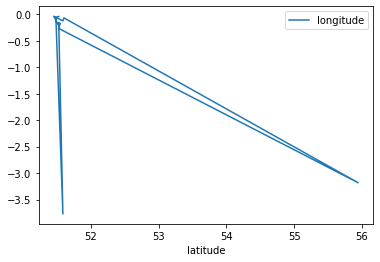

In [33]:
data_grouped.plot(x = 'latitude', y = 'longitude')

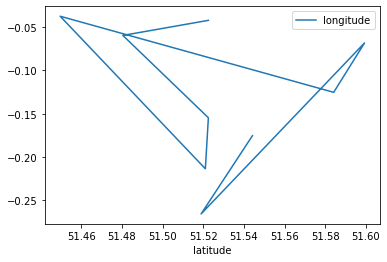

In [49]:
data_grouped = data_grouped[(data_grouped['latitude']<55) & (data_grouped['longitude']> -0.5) ]

In [46]:
# remove points that do not fall within the GLA boundary
data_grouped['latitude'].max()

55.945589

In [51]:
data_grouped.head

AttributeError: 'AxesSubplot' object has no attribute 'head'

In [ ]:
data_grouped = data_grouped[(data_grouped['latitude']<55) & (data_grouped['longitude']> -0.5) ]